# How does Linear Regression Work?
### Linear Regression is an optimization problem

First a define a __Cost Function__. This is a measure of how good your prediction is versus the actual measured values.

Find the values of m and b that minimize the following function

We will use the following, __sum of squares__, cost function.

$$ F(m,b) = \frac{1}{2} \sum_i \left(y_i - (x_i m + b) \right)^2$$

$\{x_i, y_i\}$ are known quantities (your data)

[200 162 128  98  72  50  32  18   8   2   0   2   8  18  32  50  72  98
 128 162 200]


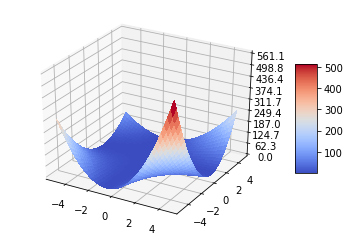

In [2]:
from shared import plot_quadratic

# What does this function look like?
# Let X and Y be known

cost_function = lambda m, b: ((X - ((Y * m) + b)) ** 2) / 2

plot_quadratic(f)


### How do we find the minimum of a convex function?
For each of the two parameters set the derivative equal to zero solve.

#### Lets start with $b$

$$ \frac{\partial F(m,b)}{\partial b} = nb  + m \sum_i x_i - \sum_i y_i $$
$$ 0 = nb  + m \sum_i x_i + \sum_i y_i $$
$$ b = \frac{1}{n} [\sum_i y_i - m \sum_i x_i]$$
$$ b = \overline{Y} - m \overline{X}$$


#### Now solve for $m$
Where $\overline{Y}$ refers to the average value of $y$ and $\overline{X}$ refers to the average value of $x$

$$ \frac{\partial F(m,b)}{\partial m} = \sum_i -x_i y_i + a x_i + bx_i^2 $$
$$ 0 = \sum_i -x_i y_i + b x_i + mx_i^2 $$

Substitute the value calculated for $b$ and solve.

$$m = \frac{\sum_i y_i x_i - n \overline{X}\overline{Y}}{\sum_i x_i^2 - n \overline{X}^2}$$



In [2]:
import numpy as np
from shared import convert, measurements, do_scikit_learn_regression

data = measurements()

xs, ys = data.get('c'), data.get('f')
    
x_mean = xs.mean()
y_mean = ys.mean()

n = len(xs)

num = (xs * ys).sum() - (n * x_mean * y_mean)
denom = (xs * xs).sum() - (n * x_mean * x_mean)

print (num / denom)

do_scikit_learn_regression(data)    

1.74332146141


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(1.7433214614143075, 32.593244482080351)